# 📚 MDM EDA Walkthrough

Welcome to **Lesson 7**! This is where we transition from discussing MDM conceptually to actively analyzing real-world misinformation data using Python.  

In this lesson, we will conduct an **exploratory data analysis (EDA)** to uncover trends in misinformation engagement on social media. 

---

🗂️ What’s in Our Dataset?  

To simulate real-world challenges in misinformation research, our dataset has been modified to include:  

🔹 **Multilingual Tweets** – Introduces the need for language detection and processing.  
🔹 **Altered Timestamps** – Simulates irregularities in data collection, requiring preprocessing.  
🔹 **Randomized Engagement Metrics** – Introduces noise, requiring filtering and normalization.   
🔹 **Obfuscated User IDs and Tweets**   
🔹 **Fake Labels** 

Each of these modifications will prompt us to ask **key questions about data reliability, preprocessing strategies, and analysis validity.**    

---

🛠️ What Will We Do in This Lesson?  

This walkthrough is designed to guide you through the **decision-making process of EDA**, with a focus on real-world application. We will:  

- 🔍 **Examine dataset structure** – What information do we have? What’s missing?  
- 📊 **Explore summary statistics and trends** – How is misinformation engagement distributed?  
- 🧹 **Discuss data cleaning considerations** – How do preprocessing choices impact analysis?  

This is not just about running code—it’s about **thinking critically about our data and analysis choices**.  
 

---

🚀 Preparing for the Next Step  

This lesson is application-focused, guiding you through the **questions and reasoning behind misinformation data analysis**.  

💡 **In the upcoming assignment, you will apply these concepts through hands-on coding.**  

By the end of this walkthrough, you'll be ready to **write your own Python code to conduct an EDA on misinformation engagement trends.** 

Let’s dive in!    

---

## 🅾️ Loading Data 

![loading](../_static/loading.png)  

Before diving into visualization, we first **inspect the dataset** to understand its shape, column types, and general properties.  

To explore these properties, we’ll use pandas, one of the most powerful libraries for handling structured data. Let’s start by loading a dataset and inspecting its structure. 

In [1]:
# Import the pandas library
import pandas as pd  

- **What it does**: This line imports the pandas library, a powerful tool for handling and analyzing structured data (tables, CSVs, Excel files, etc.). 

In [2]:
# Load dataset using pandas function read_csv
df = pd.read_csv("https://raw.githubusercontent.com/BevRice/CMI_Course/refs/heads/main/docs/source/data/data.csv", sep='|')

 - **What this line does**: Loads a dataset named data.csv from the data folder, which is one directory up (../) from my notebook's current location (e.g., source/notebooks).  Uses the read_csv() function from pandas to open the file and convert it into a DataFrame (a table-like structure for data analysis).  sep='|' specifies that the data is separated by pipes (|) instead of commas (,), which is useful for files that don’t use the standard CSV format.  Saves the dataframe in the variable "df"

📌 **What If the File Type is Different?**

1️⃣ **Comma-Separated CSV** (Default) -> df = pd.read_csv("../data/data.csv")  # No need for sep=','  
    - If the dataset uses commas as delimiters (which is the default for CSV files), there is no need to specify a separator. Simply loading the file will work as expected.  
   
2️⃣ **Tab-Separated Values** (TSV) -> df = pd.read_csv("../data/data.tsv", sep='\t')    
    - If the dataset is tab-separated, such as files with `.tsv` or `.txt` extensions, specifying the tab (`\t`) as a separator is necessary to correctly parse the data.    

3️⃣ **Excel File** (.xlsx) -> df = pd.read_excel("../data/data.xlsx", sheet_name="Sheet1")  
    - For Excel files, a different function is required to read the data properly. Additionally, if the file contains multiple sheets, the specific sheet name must be provided to ensure the correct data is loaded.    

4️⃣ **JSON File** -> df = pd.read_json("../data/data.json")  
    - JSON files, commonly used in web data and APIs, can be loaded directly without needing to specify separators. The data is typically structured as key-value pairs, making it suitable for hierarchical or nested datasets.    

5️⃣ **Parquet File** (Efficient for Large Datasets) -> df = pd.read_parquet("../data/data.parquet")  
    - Parquet is an efficient file format optimized for large-scale data storage and retrieval. It is particularly useful for big data processing because it supports columnar storage, which speeds up queries and reduces memory usage.  


![understand](../_static/understanding_data.png)  
[Source and optional reading: Mercury Media Technology, 5 tips to help you understand your data](https://www.mercurymediatechnology.com/en/blog/5-tips-to-help-you-understand-your-data/) 

## 1️⃣ Understanding Your Data  

Before diving into visualization, we first **inspect the dataset** to understand its shape, column types, and general properties. 

### **Display basic information about the dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31498 entries, 0 to 31497
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    31498 non-null  object 
 1   tweet_id   31498 non-null  object 
 2   likes      15000 non-null  float64
 3   shares     15000 non-null  float64
 4   comments   15000 non-null  float64
 5   followers  31496 non-null  float64
 6   timestamp  31496 non-null  object 
 7   language   15000 non-null  object 
 8   location   27941 non-null  object 
 9   label      31498 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.4+ MB


- **What this line does****: provides a concise summary of a dataframe including:
  1. total number of entries (or rows of data)
  2. number of columns
  3. column names
  4. number of non-null (non-missing) values in each column
  5. data types of each column
  6. approximate memory usage of the dataframe  
---
- **What can we tell about the data from this**:
  1. There are 31498 rows of twitter data here with the following 9 column names: user, tweet, likes, shares, comments, followers, timestamps, language, and location
  2. There are missing values in most columns and approximately half of entries are missing likes, shares, comments, and language
  3. Likes, shares, comments, and followers are all numerical (float)
  4. Timestamp column is currently stored as the data type "object" and may need to be converted to datetime for time-based analysis

---

### **Display the first 5 rows of data**

In [4]:
df.head()

,user_id,tweet_id,likes,shares,comments,followers,timestamp,language,location,label
0,user_id_1,tweet_id_1,435.0,80.0,26.0,2793.0,2021/08/25 15:56:00,English,"London, UK",Fake
1,user_id_2,tweet_id_2,453.0,111.0,89.0,2524.0,2022/07/10 14:43:31,English,"Johannesburg, South Africa",Fake
2,user_id_3,tweet_id_3,NaN,NaN,NaN,6380.0,2021-07-17 21:13:46,NaN,"Melbourne, Australia",Fake
3,user_id_4,tweet_id_4,NaN,NaN,NaN,399.0,2021-01-21 22:53:25,NaN,Does it matter?,Fake
4,user_id_5,tweet_id_2,108.0,88.0,41.0,362.0,2021-11-09 10:50:00,English,"New York, USA",Fake


🔍 **Key Observations from `df.head()`**

After displaying the first few rows of the dataset, we can make several key observations regarding the data structure, potential issues, and areas for further analysis.

---

1️⃣ **Missing Values Present**  
- Some rows have missing values (`NaN`), particularly in the `likes`, `shares`, `comments`, and `language` columns.  
- This suggests that **some tweets do not have engagement metrics recorded**, possibly due to data collection inconsistencies or missing records.  
- The `language` column also contains missing values, meaning **some tweets may lack detected language data**.  

✅ **Next Steps:** Investigate why these values are missing and determine whether to fill them with default values, impute them, or remove those rows.

---

2️⃣ **Timestamp Data Needs Conversion**  
- The `timestamp` column contains **date and time information** in various formats.  
  - Some timestamps are **YYYY/MM/DD HH:MM:SS** format, while others have **YYYY-MM-DD HH:MM:SS**.  
- This data should be **converted to `datetime` format** for accurate time-based analysis.  

✅ **Next Steps:** Standardize the timestamp format and analyze trends over time (e.g., **peak misinformation periods**).

---

3️⃣ **Location Data is Inconsistent**  
- The `location` column contains **both specific places and vague responses**:  
  - **"London, UK"**, **"Johannesburg, South Africa"**, and **"Melbourne, Australia"** are **valid geographic locations**.  
  - **"Does it matter?"** is **not a valid location** and may require filtering or categorization.

✅ **Next Steps:** Clean the `location` column by:  
  - Standardizing formats (e.g., separating country and city).  
  - Handling vague responses or missing values appropriately.
    
---

4️⃣ **Varying Engagement Metrics**  
- Some tweets have high engagement (`likes`, `shares`, `comments`), while others have **missing engagement data**.  
- Example:
  - The tweet from **user_id 2** has **453 likes, 111 shares, and 89 comments** (high engagement).  
  - The tweet from **user_id 3** has **NaN for likes, shares, and comments** (missing engagement).  
- Tweets with **controversial content** may receive higher engagement.  

✅ **Next Steps:** Perform **statistical analysis on engagement levels** and whether misinformation tweets tend to receive more interactions.

---

5️⃣ **Differences in Followers Count**  
- The `followers` column shows varying audience sizes:  
  - **user_id 3** has **6,380 followers**.  
  - **user_id 4** has **only 399 followers**.  
- The **follower count might influence engagement**—tweets from users with more followers might have more interactions.  

✅ **Next Steps:** Investigate the relationship between **follower count and tweet engagement** to see if higher follower numbers correlate with more likes, shares, or comments.

---


🚀 **Summary of Key Findings & Recommended Actions** 

| **Issue** | **Observation** | **Recommended Action** |
|-----------|---------------|------------------------|
| **Missing Values** | `likes`, `shares`, `comments`, `language` columns have `NaN` values. | Handle missing data via imputation or removal. |
| **Timestamp Formatting** | Different timestamp formats are present. | Convert to **datetime format** for time-based analysis. |
| **Inconsistent Locations** | Some entries contain **valid locations**, while others are vague. | Standardize and clean the `location` column. |
| **Engagement Disparity** | Some tweets have **high likes, shares, and comments**, while others have **none**. | Analyze **misinformation virality** trends. |
| **Followers Count Variance** | Users have **different audience sizes**, influencing tweet visibility. | Investigate **correlation between followers and engagement**. |

---

### **Display basic statistics of the numerical columns: likes, shares, comments, and followers**

In [5]:
df.describe()

,likes,shares,comments,followers
count,15000.000000,15000.000000,15000.000000,3.149600e+04
mean,285.178533,169.210067,57.194467,3.034292e+04
std,500.855891,269.370529,101.647370,4.629674e+05
min,0.000000,0.000000,0.000000,0.000000e+00
25%,124.000000,76.000000,25.000000,3.760000e+02
50%,251.000000,151.000000,50.000000,1.662000e+03
75%,381.000000,227.000000,76.000000,3.555000e+03
max,9932.000000,4982.000000,1986.000000,1.636969e+07


🔍 **Key Observations from `df.describe()`**

**1️⃣ General Observations**
- The dataset contains **15,000 non-null values** for `likes`, `shares`, and `comments`, meaning that **approximately 16,498 tweets are missing engagement data** (since the dataset has 31,498 rows).
- The `followers` column has **31,496 non-null values**, indicating that only **two entries are missing follower data** (which is minimal).

---

**2️⃣ Engagement Metrics (`likes`, `shares`, `comments`)**

These columns represent how much interaction each tweet received. The statistics show **high variability in engagement**:

- **Mean (Average Engagement)**
  - **Likes:** `285.18`
  - **Shares:** `169.21`
  - **Comments:** `57.19`
  - These averages suggest **most tweets receive moderate engagement**, but extreme outliers may be inflating these numbers.

- **Standard Deviation (Spread of Engagement)**
  - **Likes:** `500.85`
  - **Shares:** `269.37`
  - **Comments:** `101.65`
  - High standard deviations suggest **a large range of engagement levels**, with some tweets being highly popular and others receiving little attention.

- **Minimum & Quartiles**
  - **Min values = 0** for all engagement metrics, meaning **some tweets had no likes, shares, or comments**.
  - **25th percentile (Q1) values**:
    - **Likes ≤ 124**, **Shares ≤ 76**, **Comments ≤ 25**
    - At least 25% of tweets have **low engagement**.
  - **75th percentile (Q3) values**:
    - **Likes ≤ 381**, **Shares ≤ 227**, **Comments ≤ 76**
    - Even among the top 25% of tweets, engagement remains moderate.
  - **Max values are disproportionately high**:
    - **9,932 likes**, **4,982 shares**, **1,986 comments**
    - Suggests the presence of **viral tweets with extreme engagement**.

✅ **Next Steps:**
- Investigate **engagement distribution** (e.g., histogram, boxplot) to confirm if engagement is **skewed**.
- Analyze whether **misinformation tweets receive higher engagement** than factual ones.
- Consider **log-transforming engagement metrics** to handle extreme values.

---

**3️⃣ Followers (`followers`)**

- **Mean followers:** `30,342`, suggesting **high audience sizes on average**, but likely skewed by large accounts.
- **Standard deviation:** `462,967`, which is **extremely high**, indicating a **massive variation** in follower counts.
- **Min & Quartiles**
  - **Min value = 0**, meaning some users **have no followers** (likely bot accounts or inactive users).
  - **25th percentile (Q1) = 376 followers**, meaning 25% of users have **fewer than 376 followers**.
  - **50th percentile (Median) = 1,662 followers**, showing that **half of the users have under 1,662 followers**.
  - **75th percentile (Q3) = 3,555 followers**, meaning even the top 25% of users have **moderate followings**.
  - **Max value = 16,369,690 followers**, indicating the presence of **high-profile users or organizations**.

✅ **Next Steps:**
- **Log-transform follower counts** for better analysis due to extreme outliers.
- Compare **follower count vs. engagement** to see if larger accounts receive more interactions.
- Detect **bot-like behavior**, especially accounts with **0 followers but high engagement**.

---

🚀 **Summary of Key Findings & Next Steps**

| **Metric** | **Observation** | **Recommended Action** |
|------------|---------------|------------------------|
| **Missing Engagement Data** | 16,498 tweets lack engagement values. | Handle missing values (fill with 0 or impute). |
| **High Variability in Engagement** | Some tweets have **viral reach**, others have **zero interactions**. | Analyze outliers and engagement distribution. |
| **Extreme Outliers in Followers** | A few users have **millions of followers**, while many have **low audience sizes**. | Log-transform follower counts for better scaling. |
| **Skewed Engagement Distribution** | Most tweets have **low likes/shares/comments**, but a few have **huge spikes**. | Use **boxplots/histograms** to visualize engagement spread. |
| **Followers vs. Engagement** | Some accounts with **low followers still receive high engagement**. | Explore bot detection or misinformation amplification trends. |

---


Now that we have a data **snapshot (`df.info()`)**, examined the dataset's **structure (`df.head()`)** and **statistical properties (`df.describe()`)**, we can begin **data preprocessing**. This includes:

✅ Handling **missing values** in engagement metrics.  
✅ Standardizing **timestamp formats** and preparing categorical data.  
✅ Standardizing **locations**. 
✅ Investigating **outliers** and deciding whether to filter them.  

🚀 **Let’s move on to cleaning and preparing our data!**  

---

![missing](../_static/missing_data.png)  

## 2️⃣ Handling Missing Values 

🔍 **Identifying Missing Data ** 
From our previous `df.info()` analysis, we found missing values in multiple columns:  
- **`likes`, `shares`, `comments`** (missing for about half the dataset).  
- **`language`** (missing for a significant number of tweets).  
- **`location`** (some vague or missing entries).  

✅ **Strategies for Handling Missing Data**  
| **Column** | **Missing Data Issue** | **Recommended Solution** |
|-----------|-----------------|------------------|
| `likes`, `shares`, `comments` | Some tweets have no engagement data. | Leave as null or Fill missing values with `0` (assuming no engagement). |
| `language` | Some tweets lack language detection. | Use text-based language detection or mark as `"Unknown"`. |
| `location` | Some users did not provide locations. | Mark as `"Unknown"` or categorize as `"Unspecified"`. |

---

🔍 **Handling Missing Values in Our Data**

Handling missing values is an essential part of data preprocessing. Instead of removing missing data entirely, we must decide the best strategy for each column based on its significance and the nature of the data.

---

### **1️⃣ Keeping Null Values in `likes`, `shares`, and `comments`**  

✅ **Why Leave These Values as Null?**  
Instead of filling missing engagement values with `0`, we will **leave them as `NaN`** (null). This approach is beneficial for the following reasons:  

- **Preserves the distinction between missing data and true zero engagement:**  
  - A `0` could indicate a tweet received no interactions.  
  - A `NaN` might mean the engagement data was not collected or is unavailable.  
- **Prevents misleading statistical summaries:**  
  - Filling missing values with `0` could artificially **lower the mean engagement rates** and skew distribution analysis.  
- **Allows for advanced imputation strategies later:**  
  - If needed, we can estimate missing values based on engagement trends rather than assuming `0`.  

✅ **Action Taken:** **Leave `likes`, `shares`, and `comments` as they are (`NaN`).**  

---

### **2️⃣ Filling Missing Values in `language` with `'Unknown'`**

In [6]:
df['language'] = df['language'].fillna('Unknown')

- This line of code replaces all missing values (NaN) in the language column with 'Unknown'.

✅ Why is this a good approach?
- Prevents dropping useful rows: If we removed rows with missing languages, we might lose valuable engagement and content data.
- Maintains categorical consistency: Instead of having null values, which may cause issues in categorical analysis, we explicitly mark unknown entries.
- Helps during filtering and analysis: Analysts can easily filter for "Unknown" languages and decide how to handle them later.

✅ Action Taken: Replace missing values in language with 'Unknown'.

### 3️⃣ **Filling Missing Values in location with 'Unspecified'**

In [7]:
df['location'] = df['location'].fillna('Unspecified')

- This line replaces all NaN values in the location column with 'Unspecified'.

✅ Why is this a good approach?

- Retains valuable tweet data: Removing rows with missing locations would result in unnecessary data loss.
- Standardizes missing location data: Instead of leaving blank values, "Unspecified" makes it clear that the location is unknown.
- Useful for geographical analysis: Analysts can easily group "Unspecified" locations separately from real locations.

✅ Action Taken: Replace missing values in location with 'Unspecified'.

## 3️⃣ Exploring Distributions
Understanding the spread of numerical data helps us detect skewness, outliers, and potential transformations needed.

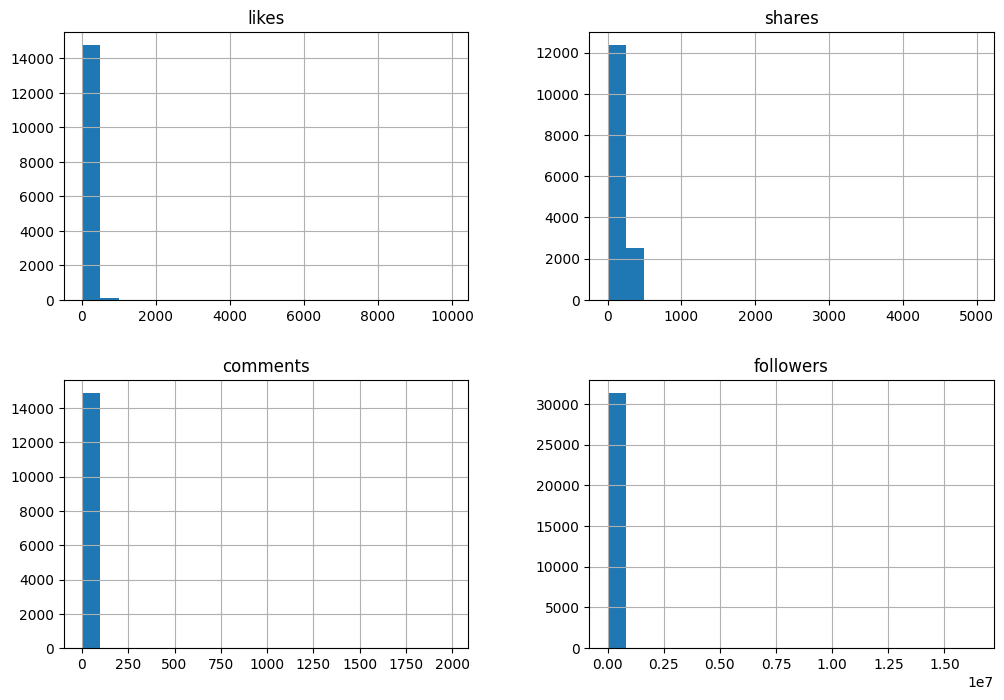

In [8]:
#Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
df[['likes', 'shares', 'comments', 'followers']].hist(figsize=(12, 8), bins=20)
plt.show()

🔍 **Key Observations:**

- 1️⃣ Highly Skewed Distributions
    - All four variables appear highly right-skewed, meaning most values are concentrated at the lower end of the scale with a few extreme outliers.
    - This is common in social media data where a small percentage of posts get very high engagement while most receive little to no interaction.  

- 2️⃣ Likes, Shares, and Comments Are Heavily Clustered at Low Values
    - The vast majority of tweets have very few likes, shares, and comments.
    - There are some extreme values (outliers) that are likely from viral tweets.
    - The long right tail suggests that log transformation may be useful for better visualization.

- 3️⃣ Followers Distribution Shows a Similar Trend
    - Most users have very few followers, but a few accounts have millions of followers.
    - This aligns with the power law distribution of social media, where a small number of influencers dominate engagement.

📌 **Next Steps: How to Handle These Distributions?**

✅ Consider Log Transformation: Applying log(1 + x) to likes, shares, comments, and followers can reduce skewness and make patterns more interpretable.

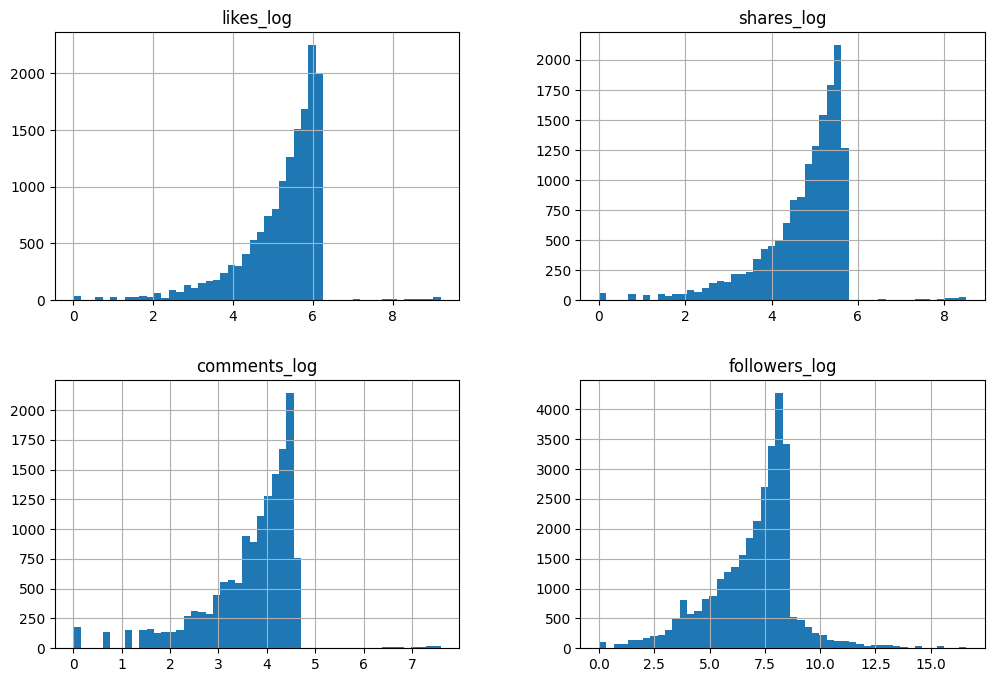

In [9]:
#Import required libraries
import numpy as np

#Log transform the 4 numeric variables in the dataset
df['likes_log'] = np.log1p(df['likes'])
df['shares_log'] = np.log1p(df['shares'])
df['comments_log'] = np.log1p(df['comments'])
df['followers_log'] = np.log1p(df['followers'])

# Plot histograms for log transformed columns
df[['likes_log', 'shares_log', 'comments_log', 'followers_log']].hist(figsize=(12, 8), bins=50)
plt.show()

**Key Improvements in Distribution**

✅ Reduced Skewness

- The original histograms showed extreme right skewness (high concentration at low values with a long right tail).
- After log transformation, the data appears more balanced, helping make statistical analyses and visualizations more meaningful.

✅ More Normal-Like Shape

- The transformed variables now resemble a bell-shaped or Gaussian-like distribution, particularly for followers_log.
- This improves the effectiveness of correlation analysis, regression modeling, and clustering techniques.

✅ Better Comparability Between Small & Large Values

- In the raw data, tweets with few likes were barely visible compared to viral tweets.
- Log transformation compresses extreme values, allowing for better visual contrast between lower- and higher-engagement tweets.

**Observations on Specific Variables**

- likes_log, shares_log, and comments_log still somewhat skewed but much more interpretable than before.  The peak around log(6) (~400 likes/shares/comments in raw scale) suggests a common engagement level for many tweets.
- followers_log now appears more symmetrical, resembling a normal distribution.  This transformation is especially useful, given that some users have millions of followers while most have fewer than 10,000.

📌 **Next Steps: How to Use This Transformed Data?**

This is just for your knowledge and is considered intermediate level analysis so we won't dive too deeply into this.

✅ Use log-transformed features in correlation and regression analysis

✅ Apply standardization (z-scores) for modeling

✅ Explore Engagement Patterns by User Type

✅ Feature Engineering Considerations:
- Should we create an engagement_score using a weighted combination of likes_log, shares_log, and comments_log?
- Should we segment users into low-, mid-, and high-follower groups based on followers_log?

## 4️⃣ Handling Outliers 

🔍 **Identifying Outliers**  
From our `df.describe()` results:  
- **`likes`, `shares`, `comments`** – The **maximum values** are much higher than the **75th percentile**, indicating possible viral tweets or outliers.  
- **`followers`** – The **maximum value (16M followers)** is an extreme outlier compared to the **median (1,662 followers)**.

---

###  Visualizing Outliers  

With our **log-transformed our numerical variables**, we will use **boxplots** to **visualize outliers** and detect extreme values in `likes`, `shares`, `comments`, and `followers`.

🔍 **Why Use Boxplots?**  
- **Boxplots help detect outliers** by showing the **interquartile range (IQR)** and marking values that lie **far beyond the whiskers**.  
- **They provide a quick comparison** of engagement distributions across different features.  
- **Outliers may indicate viral content** or influential users, so understanding their impact is crucial.

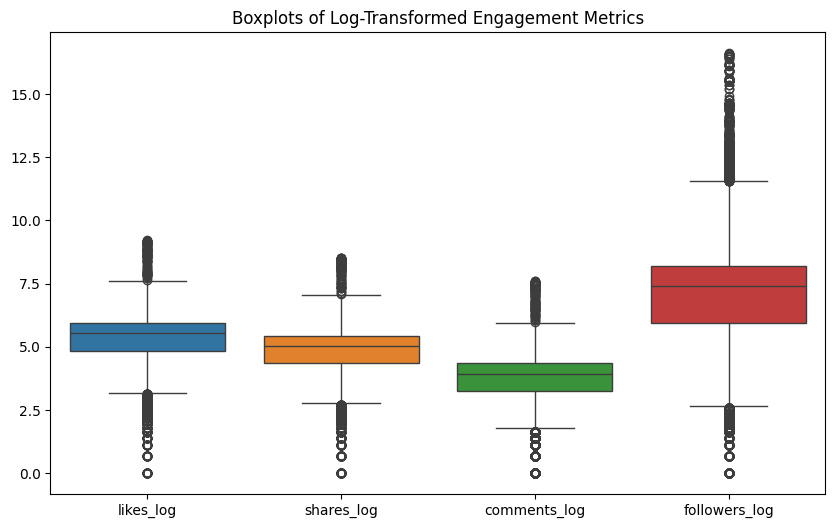

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric columns to visualize
engagement_metrics = ['likes_log', 'shares_log', 'comments_log', 'followers_log']

# Create boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[engagement_metrics])
plt.title("Boxplots of Log-Transformed Engagement Metrics")
plt.show()


---

✅ **Strategies for Handling Outliers**  

| **Column** | **Outlier Issue** | **Recommended Solution** |
|-----------|-----------------|------------------|
| `likes`, `shares`, `comments` | Viral tweets skew engagement distribution. | **Leave as is** (high engagement indicates influencers). |
| `followers` | Large accounts distort analysis. | **Leave as is** (reflects real-world social influence). |

✅ **Why We Are Keeping Outliers**
Instead of removing or modifying extreme values, we will **leave them as they are** because:  
- **Influencers and viral tweets drive engagement** – High values in `likes`, `shares`, and `comments` represent **organic trends in social media activity**.  
- **Large follower counts reflect real-world dynamics** – Social media has accounts with millions of followers, and excluding them would misrepresent the data.  
- **Log transformations or capping could distort insights** – Instead of suppressing outliers, we should analyze how they impact engagement patterns.  

❌ **When Keeping Outliers Might Not Be the Best Option**  

In some cases, **keeping extreme outliers could negatively impact the analysis**:  

1️⃣ **If Outliers Are the Result of Data Collection Errors**  
- Example: If a dataset mistakenly records **1 billion followers** for an average user, it would **distort statistical summaries**.  
- **Better Approach:** Identify data entry errors and either correct or remove them.  

2️⃣ **If Outliers Skew Statistical Models**  
- Example: If performing **linear regression** on engagement vs. followers, **a few extreme influencer accounts could dominate the model**, leading to misleading predictions.  
- **Better Approach:** Apply **log transformation** to make the distribution more normal.  

3️⃣ **If We Are Analyzing Typical User Behavior**  
- Example: If we want insights into **the average user's engagement**, keeping influencers in the dataset could lead to **incorrect generalizations**.  
- **Better Approach:** **Winsorization** (capping extreme values) or filtering out top 1% influencers.  

---

## 5️⃣ Standardizing Data Types 

🔍 **Issues with Data Types**  
- **`timestamp`** is stored as an **object** instead of a `datetime` format.  
- **`followers`** is stored as `float64` but could be optimized.  

✅ **Standardization Steps**  
| **Column** | **Current Issue** | **Recommended Fix** |
|-----------|-----------------|------------------|
| `timestamp` | Stored as a string. | Convert to `datetime` format. |
| `followers` | Stored as `float64`. | Convert to `int64` (if no decimal values exist). |

---

In [11]:
df

,user_id,tweet_id,likes,shares,comments,followers,timestamp,language,location,label,likes_log,shares_log,comments_log,followers_log
0,user_id_1,tweet_id_1,435.0,80.0,26.0,2793.0,2021/08/25 15:56:00,English,"London, UK",Fake,6.077642,4.394449,3.295837,7.935230
1,user_id_2,tweet_id_2,453.0,111.0,89.0,2524.0,2022/07/10 14:43:31,English,"Johannesburg, South Africa",Fake,6.118097,4.718499,4.499810,7.833996
2,user_id_3,tweet_id_3,NaN,NaN,NaN,6380.0,2021-07-17 21:13:46,Unknown,"Melbourne, Australia",Fake,NaN,NaN,NaN,8.761080
3,user_id_4,tweet_id_4,NaN,NaN,NaN,399.0,2021-01-21 22:53:25,Unknown,Does it matter?,Fake,NaN,NaN,NaN,5.991465
4,user_id_5,tweet_id_2,108.0,88.0,41.0,362.0,2021-11-09 10:50:00,English,"New York, USA",Fake,4.691348,4.488636,3.737670,5.894403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31493,user_id_14427,tweet_id_16511,NaN,NaN,NaN,1011.0,2021-08-02 23:05:43,Unknown,Florida,Fake,NaN,NaN,NaN,6.919684
31494,user_id_1723,tweet_id_2,86.0,22.0,15.0,4237.0,2020-01-22 05:30:00,English,"Paris, France",Fake,4.465908,3.135494,2.772589,8.351847
31495,user_id_100,tweet_id_2,259.0,297.0,48.0,2593.0,2020-10-07 19:57:00,English,"Sydney, Australia",Fake,5.560682,5.697093,3.891820,7.860956
31496,user_id_14428,tweet_id_16512,NaN,NaN,NaN,107.0,2021-02-01 21:11:40,Unknown,seattle,Fake,NaN,NaN,NaN,4.682131


In [12]:
# Standardize separators by replacing '/' with '-'
df['timestamp'] = df['timestamp'].str.replace("/", "-", regex=False)

# Convert to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', format="%Y-%m-%d %H:%M:%S")

🔍 **Explanation of the Code**

- pd.to_datetime(df['timestamp'])
        Converts the timestamp column from an object (string) to a datetime format (datetime64[ns]).

- errors='coerce'
        If a value in timestamp is invalid (e.g., not a real date), it is replaced with NaT (Not a Time, pandas' equivalent of NaN for datetime).

---

Now that we've standardized our **timestamp** column to a proper datetime format, I'd like to introduce **feature engineering**.  

📌 **Why is this important?**  
- Raw datetime values **provide limited insight on their own**.  
- By extracting meaningful components (e.g., **hour of the day, day of the week, or month**), we can uncover **patterns in engagement**.  
- This is a perfect example of **feature engineering**—transforming raw data into more useful variables!  

Since time-based transformations are some of the most **common and valuable** feature engineering techniques, this is a great moment to introduce the concept.

---

## 6️⃣ Feature Engineering 

✅ **Definition**  
**Feature engineering** is the process of **creating new variables (features) or modifying existing ones** to improve the quality of data for analysis or modeling. The goal is to **extract meaningful information from raw data** that better represents underlying patterns.  

✅ **Why is Feature Engineering Important?**  
- **Enhances predictive power** – Well-designed features help machine learning models make better predictions.  
- **Simplifies patterns in data** – By transforming or aggregating variables, we can reveal trends that might not be obvious.  
- **Reduces noise and improves interpretability** – Some raw data may be **too complex or too detailed**, making it harder to analyze.  

---

#### 🔧 **Examples of Feature Engineering in EDA**  

| **Feature Engineering Task** | **Example in Our Dataset** | **Why It’s Useful** |
|----------------|------------------|------------------|
| **Extracting time-based features** | Splitting `timestamp` into `hour` and `day_of_week` | Allows us to analyze engagement patterns by time. |
| **Creating interaction features** | Combining `likes`, `shares`, and `comments` into an `engagement_score` | Gives a single metric to assess overall tweet performance. |
| **Transforming skewed data** | Applying a log transformation to `followers` | Helps normalize extreme differences between small and large accounts. |
| **Grouping categorical values** | Reducing rare `location` entries into `"Other"` | Improves generalizability and avoids overfitting. |

💡 **Feature engineering is an iterative process** – we don’t always know which features will be most useful at the start. Instead, we use **EDA to identify opportunities for feature creation**, ensuring that each transformation adds value.  

---

#### 🚀 **How We’ll Use Feature Engineering in This Lesson**  
- We will **not treat feature engineering as a separate step** but instead **integrate it naturally into EDA**.  
- As we uncover insights (e.g., engagement varies by time of day), we will introduce new **feature transformations** to improve our dataset.  
- This **mirrors real-world data analysis workflows**, where feature engineering is informed by exploratory findings.  

---


In [13]:
# Extract useful time-based features
df['year'] = df['timestamp'].dt.year  # Extract year
df['month'] = df['timestamp'].dt.month  # Extract month
df['day_of_week'] = df['timestamp'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['hour'] = df['timestamp'].dt.hour  # Extract hour of the day
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 = weekend, 0 = weekday

# Display the first few rows to check new features
df[['timestamp', 'year', 'month', 'day_of_week', 'hour', 'is_weekend']].head()

,timestamp,year,month,day_of_week,hour,is_weekend
0,2021-08-25 15:56:00,2021.0,8.0,2.0,15.0,0
1,2022-07-10 14:43:31,2022.0,7.0,6.0,14.0,1
2,2021-07-17 21:13:46,2021.0,7.0,5.0,21.0,1
3,2021-01-21 22:53:25,2021.0,1.0,3.0,22.0,0
4,2021-11-09 10:50:00,2021.0,11.0,1.0,10.0,0


🔍 **Breakdown of Extracted Features:**

| Feature | Description | Why It's Useful |
|---------|------------|----------------|
| **`year`** | Extracts the year (e.g., 2020, 2021) | Helps analyze trends over time. |
| **`month`** | Extracts the month (1-12) | Identifies seasonal patterns in misinformation spread. |
| **`day_of_week`** | Extracts the day (0=Monday, 6=Sunday) | Reveals which days see more misinformation engagement. |
| **`hour`** | Extracts the hour (0-23) | Helps determine peak engagement hours. |
| **`is_weekend`** | Encodes weekends as `1`, weekdays as `0` | Useful for comparing engagement between weekends and weekdays. |

---


In [14]:
# Map day_of_week to actual day names
day_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
df['day_name'] = df['day_of_week'].map(day_mapping)

# Categorize hours into time of day bins
def categorize_hour(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['time_of_day'] = df['hour'].apply(categorize_hour)
df[['timestamp', 'day_of_week', 'day_name', 'hour', 'time_of_day']].head()

,timestamp,day_of_week,day_name,hour,time_of_day
0,2021-08-25 15:56:00,2.0,Wednesday,15.0,Afternoon
1,2022-07-10 14:43:31,6.0,Sunday,14.0,Afternoon
2,2021-07-17 21:13:46,5.0,Saturday,21.0,Night
3,2021-01-21 22:53:25,3.0,Thursday,22.0,Night
4,2021-11-09 10:50:00,1.0,Tuesday,10.0,Morning


🚀 **Next Steps**  

Now that we’ve extracted time-based features, we can:  

1️⃣ **Visualize engagement patterns** – Identify when misinformation spreads the most (by hour, day, or month).  
2️⃣ **Compare engagement by time of day** – Are people more likely to interact with misinformation in the morning or at night?  
3️⃣ **Analyze misinformation trends over time** – Do spikes in engagement align with real-world events?  
4️⃣ **Use these features in predictive modeling** – Incorporate `day_of_week`, `hour`, and `time_of_day` into ML models to detect misinformation trends.  

---

## 7️⃣ Basic Visualizations

In [15]:
# Print column list of my dataset
df.columns.tolist()

['user_id',
 'tweet_id',
 'likes',
 'shares',
 'comments',
 'followers',
 'timestamp',
 'language',
 'location',
 'label',
 'likes_log',
 'shares_log',
 'comments_log',
 'followers_log',
 'year',
 'month',
 'day_of_week',
 'hour',
 'is_weekend',
 'day_name',
 'time_of_day']

### Bar Plots
❓ **Key Question:**
**Do misinformation tweets follow a weekly pattern?**  
Are certain days more prone to misinformation spread, or is engagement consistent throughout the week?

---

📌 Why This Matters:  
✅ **Understanding tweet frequency by day** helps identify **high-risk days** for misinformation.    
✅ **Social media habits vary** – More activity on certain days (e.g., workdays vs. weekends).    
✅ If misinformation tweets peak on specific days, **fact-checking efforts** can be better timed.

---

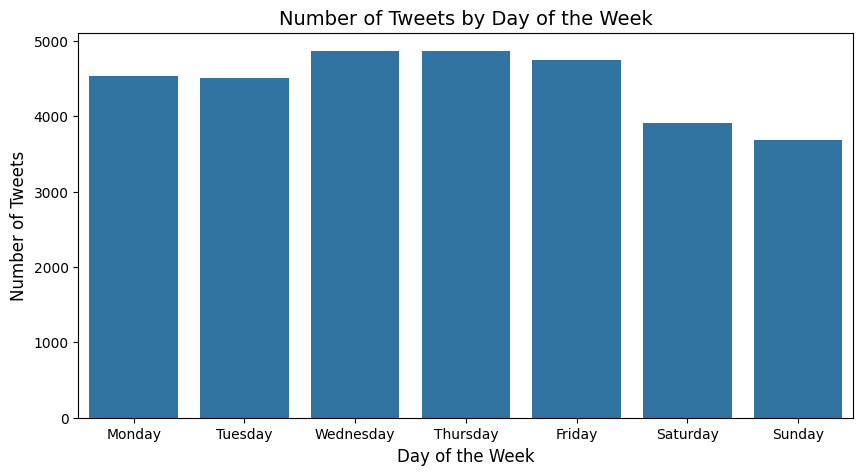

In [16]:
# Count tweets per day of the week
day_counts = df['day_name'].value_counts().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)

# Labeling
plt.title("Number of Tweets by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.show()


This bar chart shows the **number of tweets per day**, helping us understand when misinformation tweets are most frequent.

🔍 **Key Insights:**

✅ **Which days see the most misinformation?** – Are certain days more prone to misinformation spread?  
✅ **Does engagement align with tweet volume?** – Does a high number of tweets correlate with increased likes/shares?  
✅ **Weekend vs. Weekday Trends** – Are misinformation tweets more frequent on weekends?  

🔍 **Analysis: What Does This Show?**

✅ Higher tweet volume on weekdays – Tweets are more frequent from Monday to Friday, peaking mid-week.  
✅ Lower engagement on weekends – Saturday and Sunday see a noticeable drop in tweets.  
✅ Potential reasons for these trends:

- Workdays might encourage more online discussions.
- Weekends could reflect less misinformation production or moderation gaps.
- Certain misinformation topics (e.g., politics, health) may trend more on weekdays.
---

### Pie Chart  
❓ **Key Question:**  
**Do misinformation tweets follow a time-of-day pattern?**  
Are certain periods (morning, afternoon, evening, night) more prone to misinformation activity?

---

📌 **Why This Matters:**  
✅ **Understanding when misinformation is most active** helps identify **high-risk periods**.  
✅ **Social media engagement varies throughout the day** – Different times may see different types of users.  
✅ If misinformation peaks at certain hours, **fact-checking and moderation efforts** can be optimized.

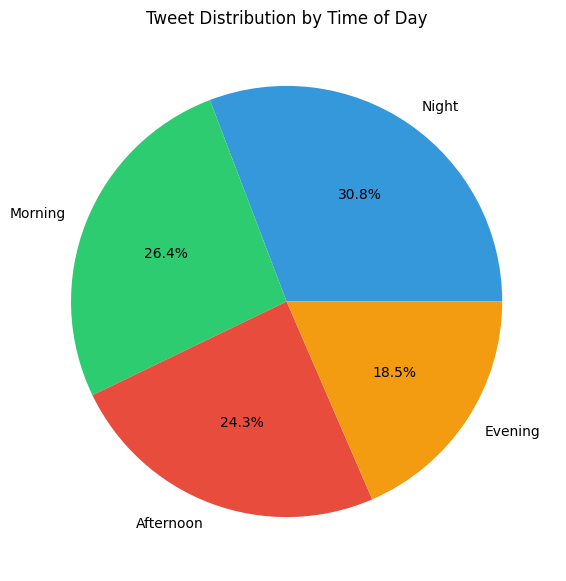

In [17]:
# Count occurrences of each time of day
time_counts = df['time_of_day'].value_counts()

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', colors=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
plt.title("Tweet Distribution by Time of Day")
plt.show()

This pie chart shows the **distribution of tweets across different times of the day**, helping us determine when misinformation is most active.

🔍 **Key Insights:**  

✅ **Which time period sees the most tweets?** – Are misinformation tweets more frequent at night or during work hours?  
✅ **Does engagement match tweet volume?** – Do people interact more during peak misinformation hours?  
✅ **Do patterns align with social media habits?** – Does misinformation spread more when people are commuting, working, or relaxing?

🔍 **Analysis: What Does This Show?**  

✅ **Night has the highest tweet volume (30.8%)** – This suggests that misinformation may spread more during **late hours**, possibly when fewer moderators are active.  
✅ **Morning and Afternoon tweets are also significant (26.4% & 24.3%)** – These periods align with **peak social media usage** during work breaks.  
✅ **Evening has the lowest tweet share (18.5%)** – This could indicate reduced social media activity or a shift toward **consuming rather than sharing content**.

**Potential Explanations:**  
- Nighttime misinformation surges may be due to **reduced content moderation** or **global audiences in different time zones**.  
- Misinformation in the morning and afternoon may reflect **news cycles and trending topics**.  
- Different types of misinformation (political, health-related) may peak at different times.

---

### Histogram  
❓ **Key Question:**  
**Do misinformation tweets show seasonal trends?**  
Are misinformation tweets more frequent in specific months, or is tweet activity evenly distributed throughout the year?

---

📌 **Why This Matters:**  
✅ **Detecting seasonal patterns** – Do misinformation tweets increase during elections, health crises, or other global events?  
✅ **Understanding user behavior** – Do social media users post more misinformation during certain times of the year?  
✅ **Anticipating misinformation surges** – Identifying patterns can help prepare countermeasures for high-activity periods.

---

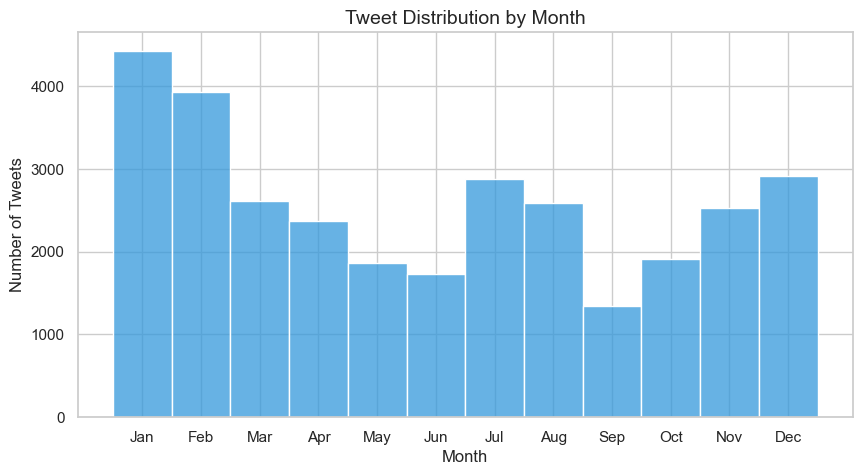

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_theme(style="whitegrid")

# Plot histogram of tweets by month
plt.figure(figsize=(10, 5))
sns.histplot(df['month'], bins=12, discrete=True, kde=False, color='#3498db')

# Labeling
plt.title("Tweet Distribution by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


This histogram visualizes the **distribution of tweets by month**, helping us identify trends in misinformation spread over the year.

🔍 **Key Insights:**  

✅ **Are misinformation tweets evenly distributed across months?** – Or do they cluster at specific times of the year?  
✅ **Are there months with noticeable spikes?** – Do misinformation tweets increase due to major events or seasonal factors?  
✅ **Are there months with lower misinformation activity?** – Does misinformation dip during certain periods?

🔍 **Analysis: What Does This Show?**  

✅ **High tweet volume in January and February** – Possible connection to **New Year events, political developments, or global discussions**.  
✅ **Low misinformation activity in May and September** – Could indicate periods of reduced misinformation spread or lower engagement.  
✅ **Fluctuations throughout the year** – Suggests that misinformation surges **are event-driven rather than constant**.

**Potential Explanations:**  
- Political events, elections, or crises might trigger **misinformation spikes** in specific months.  
- Some misinformation campaigns could be **seasonal** (e.g., health-related misinformation in flu season).  
- Variations in tweet volume might also reflect **changes in platform moderation or fact-checking efforts**.

---

### Boxplot  
❓ **Key Question:**  
**How are likes distributed across misinformation tweets?**  
Are there extreme variations in engagement, and do outliers suggest viral tweets?

---

📌 **Why This Matters:**  
✅ **Identifies engagement distribution** – Are most tweets getting similar engagement, or is there high variability?  
✅ **Detects outliers (viral tweets)** – Do a few tweets receive disproportionately high likes?  
✅ **Helps decide on data transformations** – If data is skewed, should we apply a log transformation for better analysis?

---

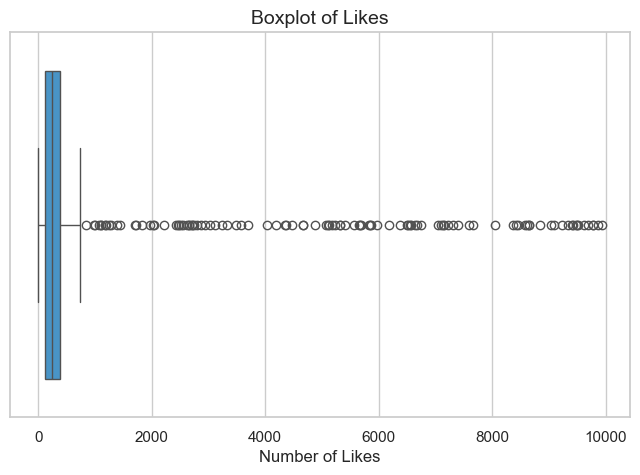

In [19]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Create boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['likes'], color='#3498db')

# Labeling
plt.title("Boxplot of Likes", fontsize=14)
plt.xlabel("Number of Likes", fontsize=12)
plt.show()


This boxplot visualizes the **distribution of likes on misinformation tweets**, highlighting the central tendency, spread, and presence of extreme values.

🔍 **Key Insights:**  

✅ **Is engagement concentrated around a certain range?** – Or does it vary significantly across tweets?  
✅ **Are there many outliers?** – The presence of extreme values (far beyond the box) suggests some tweets go viral.  
✅ **How does the median compare to the spread?** – If the median is very low compared to the upper whisker, likes may be highly skewed.

🔍 **Analysis: What Does This Show?**  

✅ **Most tweets receive very few likes** – The central box is compressed toward **lower engagement values**.  
✅ **Significant outliers (viral tweets)** – Many individual points far from the whiskers indicate that **a few tweets received massive engagement**.  
✅ **Highly skewed distribution** – Most tweets have **low engagement**, but a **small percentage go viral**, leading to an uneven spread.

**Potential Explanations:**  
- Misinformation might have **low baseline engagement** but **occasional viral tweets** amplify its reach.  
- Engagement could depend on **influencers or amplification efforts** (e.g., bots, coordinated sharing).  
- A log transformation might help **normalize the distribution** for better statistical analysis.

---

### Scatter Plot  
❓ **Key Question:**  
**Is there a correlation between likes and shares on misinformation tweets?**  
Do tweets with more likes also receive more shares, or is the relationship weak?

---

📌 **Why This Matters:**  
✅ **Understanding engagement behavior** – Do users who like misinformation tweets also share them?  
✅ **Detecting viral content patterns** – Are high-like tweets more likely to be widely shared?  
✅ **Identifying amplification strategies** – Are misinformation tweets pushed by coordinated efforts, or is sharing organic?

---

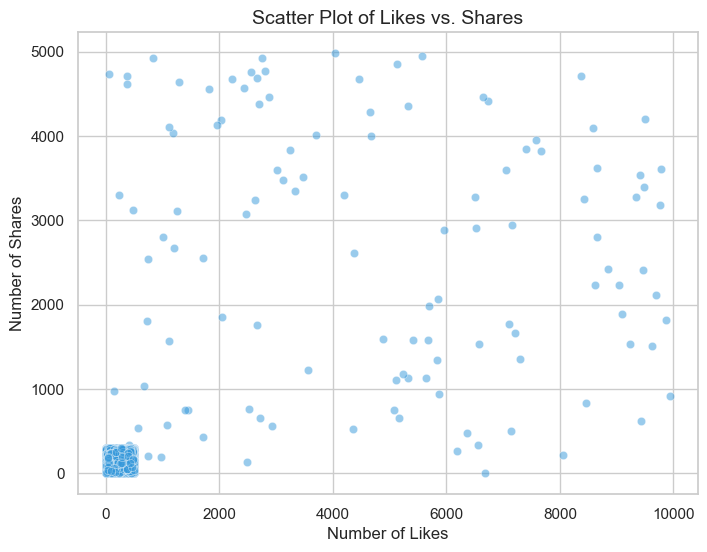

In [20]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['likes'], y=df['shares'], alpha=0.5, color='#3498db')

# Labeling
plt.title("Scatter Plot of Likes vs. Shares", fontsize=14)
plt.xlabel("Number of Likes", fontsize=12)
plt.ylabel("Number of Shares", fontsize=12)
plt.show()


This scatter plot visualizes the **relationship between likes and shares on misinformation tweets**, helping us assess whether high engagement in one metric predicts high engagement in the other.

🔍 **Key Insights:**  

✅ **Is there a positive correlation?** – Do tweets with more likes tend to have more shares?  
✅ **Are there separate engagement clusters?** – Are some tweets heavily liked but rarely shared, or vice versa?  
✅ **Are outliers (viral tweets) present?** – Do some tweets have extreme values in either direction?

🔍 **Analysis: What Does This Show?**  

✅ **Most tweets have low engagement** – A dense cluster in the bottom-left suggests that **many tweets get very few likes and shares**.  
✅ **Some tweets achieve high engagement** – A smaller subset of tweets shows **both high likes and high shares**, likely indicating **viral content**.  
✅ **Correlation appears weak but present** – While more likes **generally** lead to more shares, the relationship is **not perfectly linear**, suggesting that some tweets get **liked a lot but not widely shared**.

**Potential Explanations:**  
- Some misinformation tweets may encourage **engagement through likes but not sharing**, limiting their spread.  
- Virality may depend on **other factors** (e.g., influencer amplification, trending topics, algorithmic boosts).  
- Further analysis could explore **engagement rate per follower** or **time-based engagement trends**.

---

### Line Plot  
❓ **Key Question:**  
**When do misinformation tweets receive the most engagement?**  
Are there specific hours of the day when likes, shares, and comments peak?

---

📌 **Why This Matters:**  
✅ **Identifies peak engagement hours** – Knowing when users interact most with misinformation can help develop countermeasures.  
✅ **Analyzes user behavior** – Understanding whether engagement is higher during work hours, evenings, or late nights can provide insights into audience activity.  
✅ **Optimizes content moderation strategies** – Platforms can allocate fact-checking resources more efficiently during peak misinformation engagement times.

---

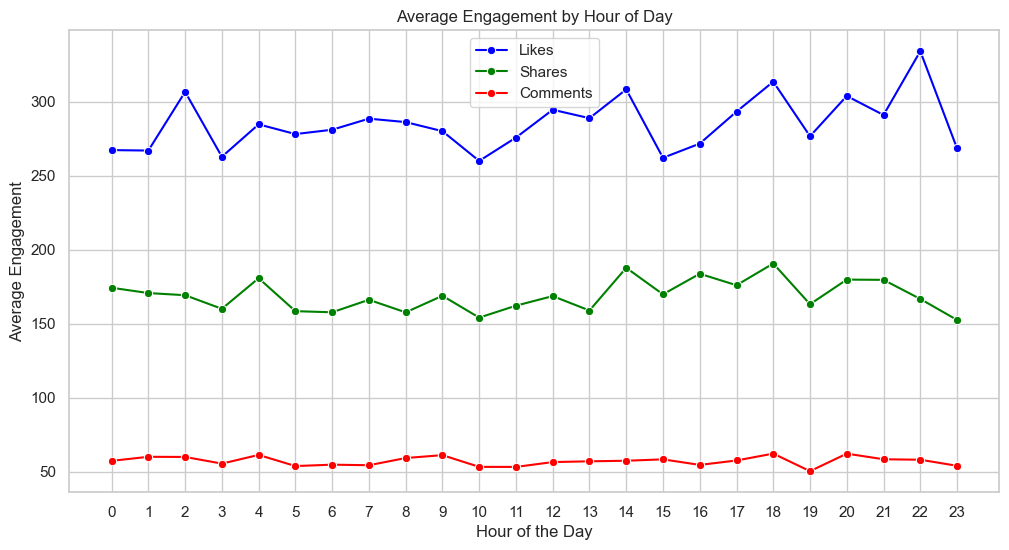

In [21]:
# Average engagement per hour of the day
hourly_engagement = df.groupby('hour').agg({'likes': 'mean', 'shares': 'mean', 'comments': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_engagement, x='hour', y='likes', label='Likes', marker='o', color='blue')
sns.lineplot(data=hourly_engagement, x='hour', y='shares', label='Shares', marker='o', color='green')
sns.lineplot(data=hourly_engagement, x='hour', y='comments', label='Comments', marker='o', color='red')

plt.title("Average Engagement by Hour of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Engagement")
plt.xticks(range(0, 24))
plt.legend()
plt.show()

This line plot visualizes the **average engagement (likes, shares, comments) for misinformation tweets at different hours of the day**, helping us detect high-risk periods.

🔍 **Key Insights:**  

✅ **When does engagement peak?** – Are likes, shares, and comments more common in the morning, afternoon, or late night?  
✅ **Are different engagement types following the same trend?** – Do likes, shares, and comments increase simultaneously, or do they behave differently?  
✅ **Are there off-peak hours?** – Do certain hours consistently show lower engagement?

🔍 **Analysis: What Does This Show?**  

✅ **Likes peak in the late night (around 23:00)** – This suggests that misinformation tweets **may receive the most passive engagement (likes) during late hours**.  
✅ **Shares and comments are more stable** – Unlike likes, shares and comments follow a **flatter trend** throughout the day, but with some fluctuations.  
✅ **Engagement dips occur during mid-morning and early afternoon** – Lower interaction between **10:00 and 14:00** may indicate reduced activity during working hours.

**Potential Explanations:**  
- **Late-night engagement surges** could be due to **users scrolling before bedtime**, when **critical thinking might be lower**.  
- **Shares and comments may not correlate perfectly with likes**, suggesting different engagement motivations.  
- **Moderation and fact-checking efforts may need to be reinforced in the late evening**, when misinformation engagement appears highest.

---

### Line Plot 2
❓ **Key Question:**  
**How has engagement with misinformation tweets changed over time?**  
Are there noticeable spikes in likes, shares, and comments that correlate with real-world events?

---

📌 **Why This Matters:**  
✅ **Identifies trends in misinformation engagement** – Do engagement levels rise and fall cyclically or remain steady?  
✅ **Detects viral misinformation events** – Large spikes may indicate misinformation surges tied to major news or political events.  
✅ **Informs counter-misinformation efforts** – Understanding engagement trends helps allocate resources for content moderation and fact-checking.

---

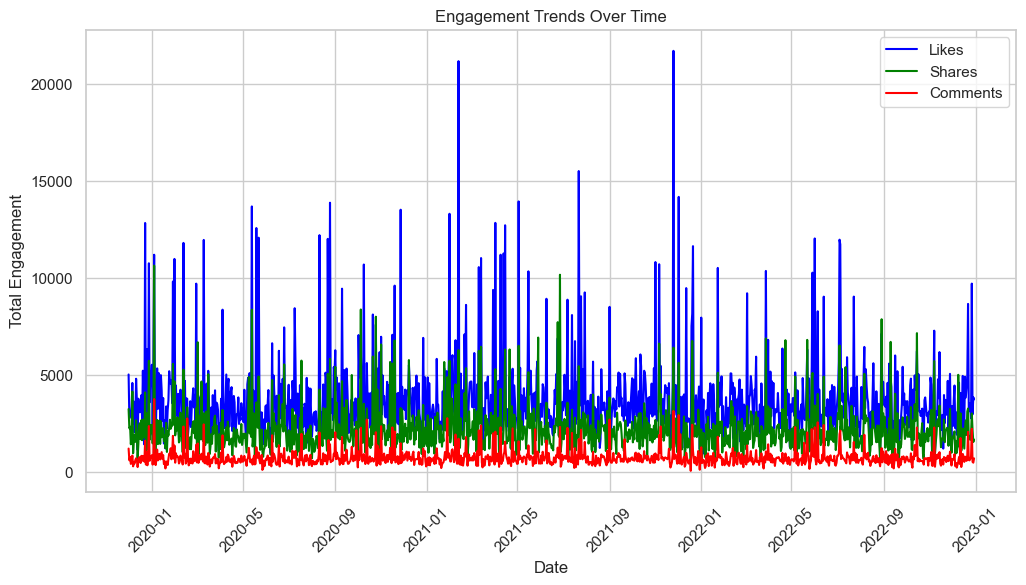

In [22]:
# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Aggregate engagement by day
time_engagement = df.groupby(df['timestamp'].dt.date).agg({'likes': 'sum', 'shares': 'sum', 'comments': 'sum'}).reset_index()

# Plot engagement over time
plt.figure(figsize=(12, 6))
plt.plot(time_engagement['timestamp'], time_engagement['likes'], label='Likes', color='blue')
plt.plot(time_engagement['timestamp'], time_engagement['shares'], label='Shares', color='green')
plt.plot(time_engagement['timestamp'], time_engagement['comments'], label='Comments', color='red')

plt.title("Engagement Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Engagement")
plt.legend()
plt.xticks(rotation=45)
plt.show()


This line plot visualizes **the total engagement (likes, shares, and comments) on misinformation tweets over time**, helping us identify significant peaks and long-term patterns.

🔍 **Key Insights:**  

✅ **Are engagement levels stable or fluctuating?** – Do likes, shares, and comments follow a consistent trend, or do they vary significantly?  
✅ **Do all engagement types behave similarly?** – Are spikes in likes always accompanied by spikes in shares and comments, or do they follow different patterns?  
✅ **Are there distinct peaks?** – Do certain dates show extreme engagement levels, indicating potential misinformation events?

🔍 **Analysis: What Does This Show?**  

✅ **Frequent spikes in engagement** – The presence of many sharp peaks suggests that **misinformation engagement is event-driven rather than steady**.  
✅ **Likes dominate engagement trends** – Blue (likes) consistently reaches the highest levels, suggesting that users are **more likely to like misinformation than share or comment on it**.  
✅ **Some extreme outliers** – Occasional **major spikes** in engagement may correlate with **specific misinformation campaigns, trending topics, or political events**.

**Potential Explanations:**  
- Peaks may coincide with **pandemic misinformation waves, elections, or geopolitical crises** that drive engagement.  
- Likes are **easier than shares/comments**, leading to more passive engagement rather than active amplification.  
- Future analysis could focus on **annotating peaks with real-world events** to better understand misinformation drivers.

---

🎯 **Lesson Summary & Key Takeaways**  

In this lesson, we walked through the **critical thinking process** behind exploratory data analysis (EDA) and applied it to **misinformation engagement metrics**.  

**🔍 What We Covered:**  
✅ **Understanding Our Data** – Examining dataset structure, data types, and missing values.  
✅ **Feature Engineering** – Extracting meaningful insights from timestamps.  
✅ **Visualizing Trends** – Exploring misinformation engagement patterns over time.  
✅ **Detecting Relationships** – Identifying correlations between likes, shares, and comments.  

**💡 Key Reflections:**  
- **What patterns did we uncover?** Did engagement vary by time, or were there consistent trends?  
- **What surprised you?** Did the data reveal anything unexpected about misinformation spread?  
- **What should we analyze further?** Are there additional variables that could impact engagement?  

---

**🚀 Next Steps: Your Assignment**
Now that you've seen an example EDA walkthrough, it's time for you to **apply these concepts** to another dataset.

---

🔎 **Let’s move forward!** 

[Provide Anonymous Feedback on this Lesson Here](https://forms.gle/4ZRmNr5rmGCAR1Re6)